[[ 6.98553633e-01 -3.78289607e-01]
 [-2.77301059e-01  2.31888184e-01]
 [-1.96579629e-01  3.00413922e-01]
 [-3.30266479e-02 -3.02143023e-01]
 [-1.51712282e-01  3.16250218e-01]
 [-8.01071690e-01 -1.08656135e-01]
 [ 1.00816914e+00  2.07309295e-01]
 [ 3.58461933e-02 -3.29570369e-01]
 [-8.78779302e-02 -1.87921047e-01]
 [-9.88928208e-01 -9.26102014e-02]
 [ 1.28063385e-01  2.27043566e-01]
 [ 2.68947263e-01  7.35169744e-02]
 [ 7.74176833e-01  8.22258534e-01]
 [ 1.05386434e-01  2.05839105e-01]
 [ 3.78005981e-01 -8.12824528e-02]
 [ 9.37162087e-01  2.05987221e-01]
 [-2.50650114e-01  4.97883672e-02]
 [ 8.70663721e-02 -3.19014035e-01]
 [-1.14829240e-01 -3.75736627e-01]
 [ 1.02684872e+00 -2.66939738e-01]
 [-8.69193490e-01  6.85448273e-01]
 [-3.56386870e-03  2.94420243e-01]
 [ 2.31538284e-02 -8.12416827e-01]
 [ 1.42745190e-01  1.50682985e-01]
 [-9.57389366e-01 -3.49206448e-01]
 [-1.03433425e-01  2.74695936e-01]
 [ 1.30868360e-01  9.30546483e-02]
 [ 3.68169092e-02  9.51356467e-01]
 [ 6.71357733e-01 -8

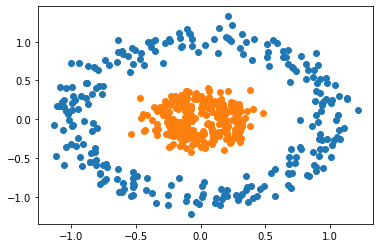

In [34]:
import numpy as np
import tensorflow.keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn import datasets
np.random.seed(0)
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state = 123, noise=0.1, factor=0.25)
print(X) 
print(y)
 
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

Epoch 1/80


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 3ms/step - loss: 0.7216 - accuracy: 0.5180
Epoch 2/80
25/25 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.5700
Epoch 3/80
25/25 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.4180
Epoch 4/80
25/25 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.4820
Epoch 5/80
25/25 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.4620
Epoch 6/80
25/25 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4960
Epoch 7/80
25/25 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.3940
Epoch 8/80
25/25 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.6060
Epoch 9/80
25/25 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5740
Epoch 10/80
25/25 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.3840
Epoch 11/80
25/25 [===========

Text(0.5, 0, 'epoch')

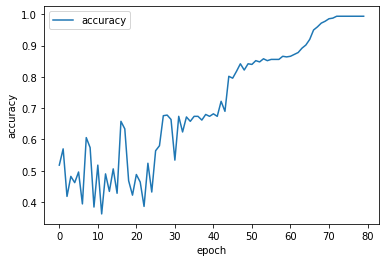

In [35]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr = 0.01), 'binary_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=y, verbose=1, batch_size=20, epochs=80, shuffle='true')
plt.plot(h.history['accuracy'])
plt.legend(['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')


Text(0.5, 0, 'epoch')

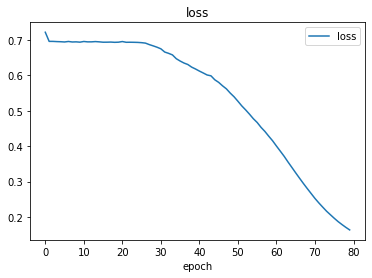

In [36]:
plt.plot(h.history['loss'])
plt.legend(['loss'])
plt.title('loss')
plt.xlabel('epoch')

Prediction is:  [[0.89758754]]


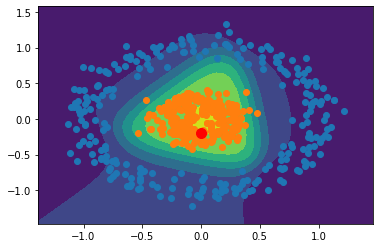

In [37]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

 
x = 0
y = -0.2
 
point = np.array([[x, y]])
predict = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is: ", predict)